<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Модель-линейной-регрессии" data-toc-modified-id="Модель-линейной-регрессии-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Модель линейной регрессии</a></span></li><li><span><a href="#Стохастический-градиентный-бустинг" data-toc-modified-id="Стохастический-градиентный-бустинг-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Стохастический градиентный бустинг</a></span></li><li><span><a href="#Модель-XGBoost" data-toc-modified-id="Модель-XGBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Модель XGBoost</a></span></li><li><span><a href="#Модель-CatBoost" data-toc-modified-id="Модель-CatBoost-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Модель CatBoost</a></span></li><li><span><a href="#Модель-LGBMRegressor" data-toc-modified-id="Модель-LGBMRegressor-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Модель LGBMRegressor</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Описание данных

Данные находятся в файле /datasets/autos.csv.

Признаки:
- DateCrawled — дата скачивания анкеты из базы
- VehicleType — тип автомобильного кузова
- RegistrationYear — год регистрации автомобиля
- Gearbox — тип коробки передач
- Power — мощность (л. с.)
- Model — модель автомобиля
- Kilometer — пробег (км)
- RegistrationMonth — месяц регистрации автомобиля
- FuelType — тип топлива
- Brand — марка автомобиля
- NotRepaired — была машина в ремонте или нет
- DateCreated — дата создания анкеты
- NumberOfPictures — количество фотографий автомобиля
- PostalCode — почтовый индекс владельца анкеты (пользователя)
- LastSeen — дата последней активности пользователя

Целевой признак
- Price — цена (евро)

## Подготовка данных

Начнем с импорта необходимы для дальнейшей работы инструментов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import warnings
warnings.filterwarnings('ignore')

Взглянем на данные

In [2]:
df= pd.read_csv('/datasets/autos.csv')
df

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,2016-03-21 09:50:58,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,2016-03-21 00:00:00,0,2694,2016-03-21 10:42:49
354365,2016-03-14 17:48:27,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
354366,2016-03-05 19:56:21,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
354367,2016-03-19 18:57:12,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
DateCrawled          354369 non-null object
Price                354369 non-null int64
VehicleType          316879 non-null object
RegistrationYear     354369 non-null int64
Gearbox              334536 non-null object
Power                354369 non-null int64
Model                334664 non-null object
Kilometer            354369 non-null int64
RegistrationMonth    354369 non-null int64
FuelType             321474 non-null object
Brand                354369 non-null object
NotRepaired          283215 non-null object
DateCreated          354369 non-null object
NumberOfPictures     354369 non-null int64
PostalCode           354369 non-null int64
LastSeen             354369 non-null object
dtypes: int64(7), object(9)
memory usage: 43.3+ MB


In [4]:
df.isna().mean()

DateCrawled          0.000000
Price                0.000000
VehicleType          0.105794
RegistrationYear     0.000000
Gearbox              0.055967
Power                0.000000
Model                0.055606
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092827
Brand                0.000000
NotRepaired          0.200791
DateCreated          0.000000
NumberOfPictures     0.000000
PostalCode           0.000000
LastSeen             0.000000
dtype: float64

Данные достаточно "сырые", имеется много пропусков (до 20%). Как с ними работать нам еще предстоит разобраться, а пока начнем с меньшего, например, проверим на дубликаты.

In [5]:
df.duplicated().sum()

4

In [6]:
df[df.duplicated() == True]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
171088,2016-03-08 18:42:48,1799,coupe,1999,auto,193,clk,20000,7,petrol,mercedes_benz,no,2016-03-08 00:00:00,0,89518,2016-03-09 09:46:57
231258,2016-03-28 00:56:10,1000,small,2002,manual,83,other,150000,1,petrol,suzuki,no,2016-03-28 00:00:00,0,66589,2016-03-28 08:46:21
258109,2016-04-03 09:01:15,4699,coupe,2003,auto,218,clk,125000,6,petrol,mercedes_benz,yes,2016-04-03 00:00:00,0,75196,2016-04-07 09:44:54
325651,2016-03-18 18:46:15,1999,wagon,2001,manual,131,passat,150000,7,gasoline,volkswagen,no,2016-03-18 00:00:00,0,36391,2016-03-18 18:46:15


Всего 4 дубликата, которые смело удаляем.

In [7]:
df = df.drop_duplicates().reset_index(drop=True)

In [8]:
df.duplicated().sum()

0

В данных есть столбцы, которые ни коим образом не повлияют на качество предсказаний будущих моделей, а лишь усложнят процесс обучения, и, возможно, даже приведут к его ухудшению. Поэтому удалим их из нашего набора данных

In [9]:
df = df.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures','PostalCode', 'LastSeen'], axis=1)
df.columns

Index(['Price', 'VehicleType', 'RegistrationYear', 'Gearbox', 'Power', 'Model',
       'Kilometer', 'RegistrationMonth', 'FuelType', 'Brand', 'NotRepaired'],
      dtype='object')

Пробег автомобиля, на первый взгляд, численный признак, но чтобы убедиться в этом построим график распределения данных в этом столбце.

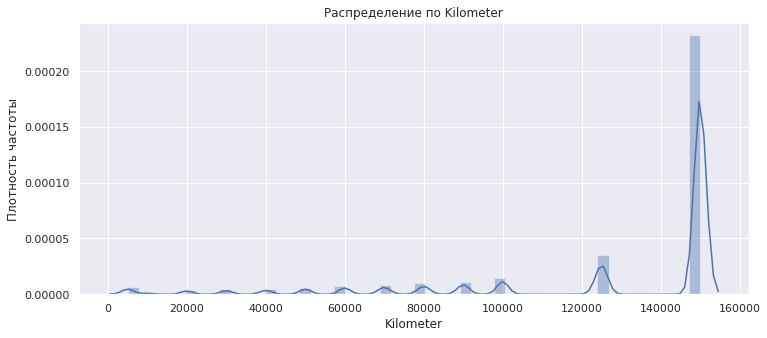

In [10]:
sns.set()
fig, ax = plt.subplots(figsize=(12, 5))
sns.distplot(df['Kilometer'])
ax.set_title('Распределение по Kilometer')
plt.ylabel('Плотность частоты');

Как видно из графика,в данном датасете пробег - категориальный признак. Выделим все такие признаки в отдельный датасет и проанализиуем данные в нём.

In [11]:
categorial_features = df.drop(['Price', 'Power'], axis = 1).copy()
categorial_features

,VehicleType,RegistrationYear,Gearbox,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,NaN,1993,manual,golf,150000,0,petrol,volkswagen,NaN
1,coupe,2011,manual,NaN,125000,5,gasoline,audi,yes
2,suv,2004,auto,grand,125000,8,gasoline,jeep,NaN
3,small,2001,manual,golf,150000,6,petrol,volkswagen,no
4,small,2008,manual,fabia,90000,7,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...
354360,NaN,2005,manual,colt,150000,7,petrol,mitsubishi,yes
354361,NaN,2005,NaN,NaN,20000,1,NaN,sonstige_autos,NaN
354362,convertible,2000,auto,fortwo,125000,3,petrol,smart,no
354363,bus,1996,manual,transporter,150000,3,gasoline,volkswagen,no


In [12]:
categorial_features.isna().mean()

VehicleType          0.105795
RegistrationYear     0.000000
Gearbox              0.055968
Model                0.055607
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.092828
Brand                0.000000
NotRepaired          0.200793
dtype: float64

Именно в этих данных имеют большие пропуски. Возможно, мы найдем и аномалии. Для этого оценим данные, визуализировав их.

In [13]:
def distribution(feature):
    print('\033[1m' + feature, '\033[0m')
    print(df[feature].describe(percentiles = [0, .05, .10, .15, .20, .25, .50, .75, .80, .85, .90, .95]))
    fig, ax = plt.subplots(figsize=(12, 5))
    plt.xticks(rotation=90)
    sns.countplot(df[feature])
    ax.set_title('Распределение по '+ feature)
    plt.ylabel('Плотность частоты')
    plt.show()
    print('\n')

In [14]:
categorial_features_list = set(categorial_features.columns)
categorial_features_list

{'Brand',
 'FuelType',
 'Gearbox',
 'Kilometer',
 'Model',
 'NotRepaired',
 'RegistrationMonth',
 'RegistrationYear',
 'VehicleType'}

VehicleType 
count     316875
unique         8
top        sedan
freq       91457
Name: VehicleType, dtype: object


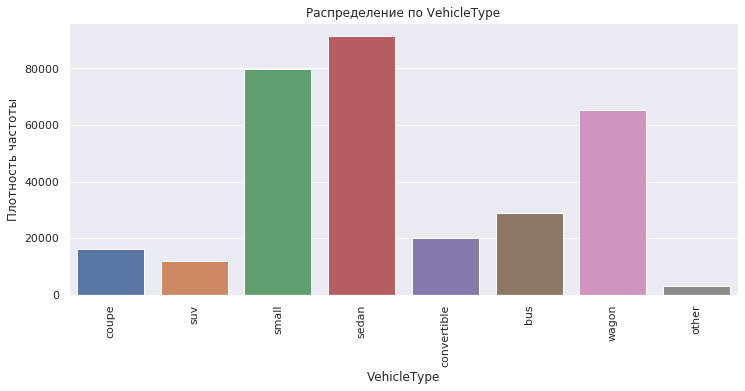



NotRepaired 
count     283211
unique         2
top           no
freq      247158
Name: NotRepaired, dtype: object


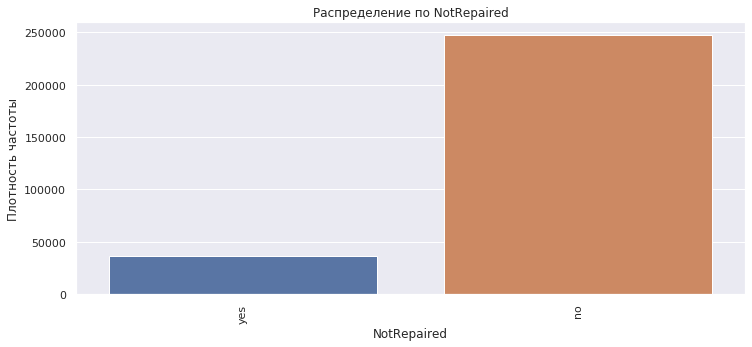



Model 
count     334660
unique       250
top         golf
freq       29232
Name: Model, dtype: object


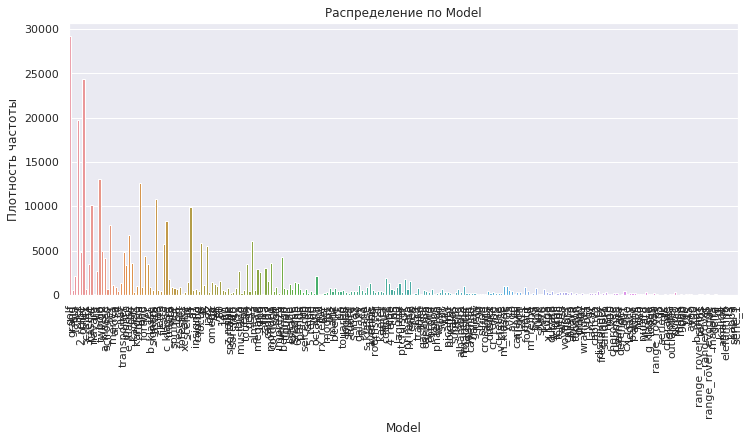



Kilometer 
count    354365.000000
mean     128211.363989
std       37905.083858
min        5000.000000
0%         5000.000000
5%        40000.000000
10%       70000.000000
15%       80000.000000
20%      100000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
80%      150000.000000
85%      150000.000000
90%      150000.000000
95%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64


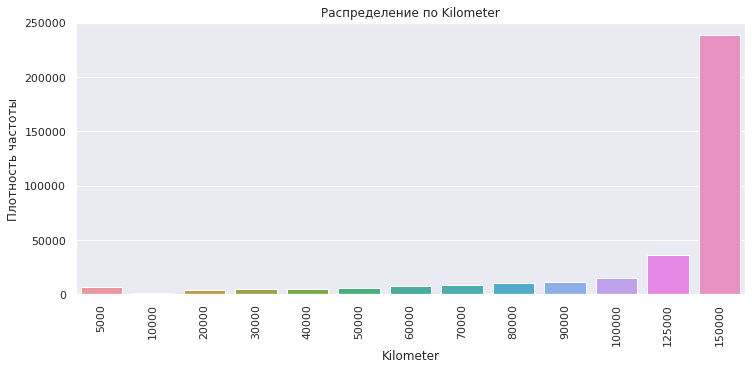



FuelType 
count     321470
unique         7
top       petrol
freq      216349
Name: FuelType, dtype: object


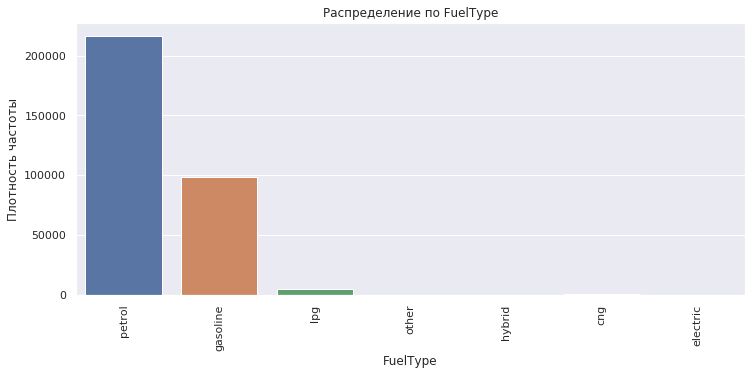



RegistrationMonth 
count    354365.000000
mean          5.714650
std           3.726432
min           0.000000
0%            0.000000
5%            0.000000
10%           0.000000
15%           1.000000
20%           2.000000
25%           3.000000
50%           6.000000
75%           9.000000
80%          10.000000
85%          10.000000
90%          11.000000
95%          12.000000
max          12.000000
Name: RegistrationMonth, dtype: float64


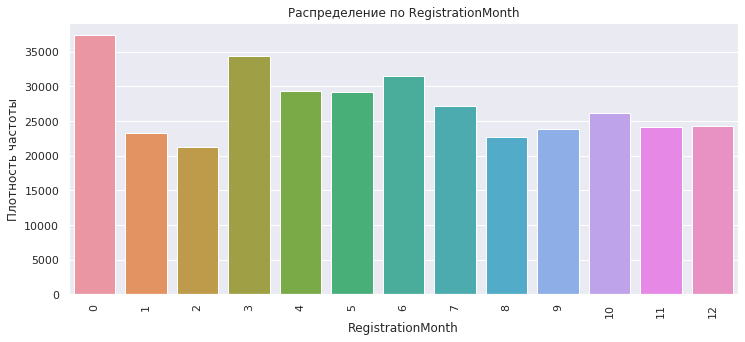



RegistrationYear 
count    354365.000000
mean       2004.234481
std          90.228466
min        1000.000000
0%         1000.000000
5%         1992.000000
10%        1995.000000
15%        1997.000000
20%        1998.000000
25%        1999.000000
50%        2003.000000
75%        2008.000000
80%        2009.000000
85%        2010.000000
90%        2012.000000
95%        2016.000000
max        9999.000000
Name: RegistrationYear, dtype: float64


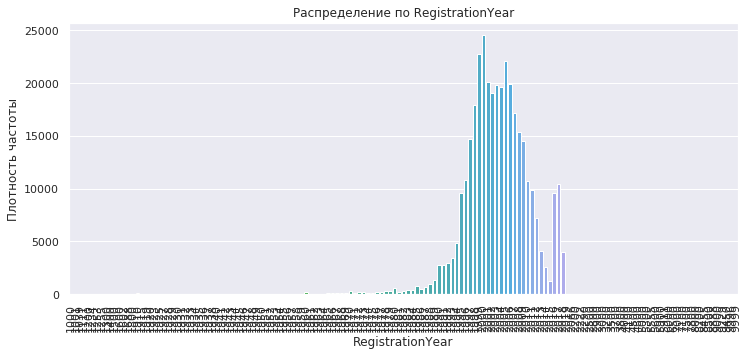



Brand 
count         354365
unique            40
top       volkswagen
freq           77012
Name: Brand, dtype: object


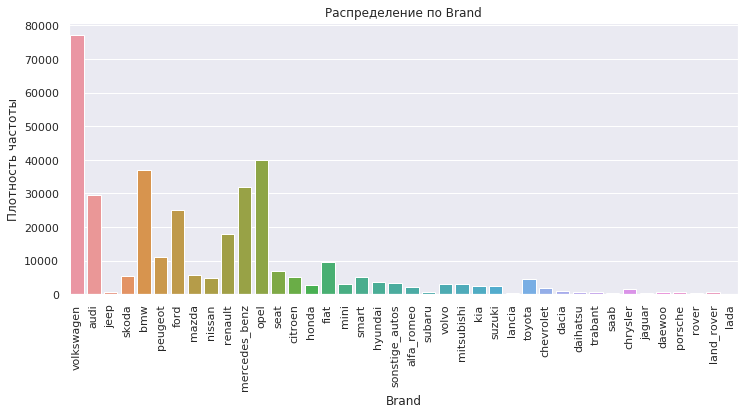



Gearbox 
count     334532
unique         2
top       manual
freq      268249
Name: Gearbox, dtype: object


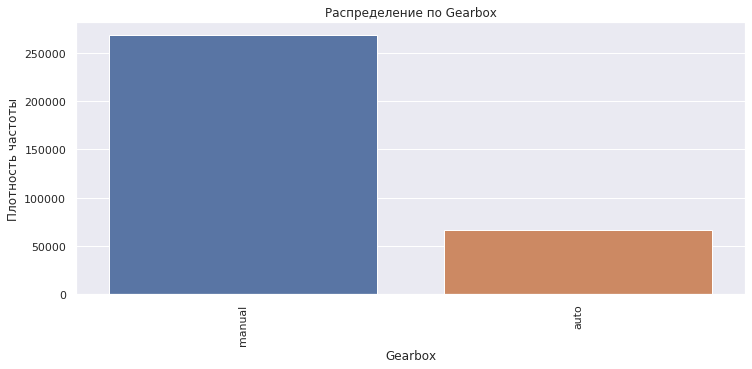

[None, None, None, None, None, None, None, None, None]

In [15]:
[distribution(feature) for feature in categorial_features_list]

По полученных графикам можно сделать следующие выводы:
 - присутствуют аномальные выбросы в признаке "Год выпуска"
 - присутствует очевидно ошибочное значение 0 в признаке "Месяц регистрации"
 - график с распределением по моделям не информативен ввиду огрмной вариативности в этом признаке. Зато, теперь мы знаем, что самый популярный автомобиль - wolcsvagen golf
 - больше всего в продаже седанов на бензине с механической коробкой передач и большим пробегом

Начнем обрабатывать аномалии с признака "год регистрации". Судя по всему, следует отфильтровать значения в пределах интервала (5% - 95%), так мы избавимся от очевидных выбросов, например, 1000 год выпуска, и 9999 год выпуска.

In [16]:
len(categorial_features[(df.RegistrationYear < df.RegistrationYear.quantile(.05))
                    | (df.RegistrationYear > df.RegistrationYear.quantile(.95))])/len(df)

0.08400095946270089

Таких значений в датасете 8.5%, что достаточно много, но не критично, поэтому просто удалим эти аномалии.

In [17]:
df = df.drop(df[(df.RegistrationYear < df.RegistrationYear.quantile(.05)) 
                                             | (df.RegistrationYear > df.RegistrationYear.quantile(.95))].index)


Нулевой месяц регистрации - это, разумеется, ошибка. Будем полагать, что это ошибка при заполнении данных и имелся ввиду первый месяц, то есть, январь.

In [18]:
df['RegistrationMonth'] = df['RegistrationMonth'].replace(0, 1)

In [19]:
categorial_features = df.drop(['Price', 'Power'], axis = 1).copy()
categorial_features

,VehicleType,RegistrationYear,Gearbox,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired
0,NaN,1993,manual,golf,150000,1,petrol,volkswagen,NaN
1,coupe,2011,manual,NaN,125000,5,gasoline,audi,yes
2,suv,2004,auto,grand,125000,8,gasoline,jeep,NaN
3,small,2001,manual,golf,150000,6,petrol,volkswagen,no
4,small,2008,manual,fabia,90000,7,gasoline,skoda,no
...,...,...,...,...,...,...,...,...,...
354360,NaN,2005,manual,colt,150000,7,petrol,mitsubishi,yes
354361,NaN,2005,NaN,NaN,20000,1,NaN,sonstige_autos,NaN
354362,convertible,2000,auto,fortwo,125000,3,petrol,smart,no
354363,bus,1996,manual,transporter,150000,3,gasoline,volkswagen,no


In [20]:
categorial_features.isna().mean()

VehicleType          0.064723
RegistrationYear     0.000000
Gearbox              0.048577
Model                0.047419
Kilometer            0.000000
RegistrationMonth    0.000000
FuelType             0.075866
Brand                0.000000
NotRepaired          0.184508
dtype: float64

После отфильтровывания части аномалий, датасет уменьшился, а вместе с ним уменьшилось и количество отсутствующих данных. Посмотрим на распределение данных в очищенном датасете.

In [21]:
categorial_features_list.remove('Model')

VehicleType 
count     303589
unique         8
top        sedan
freq       85975
Name: VehicleType, dtype: object


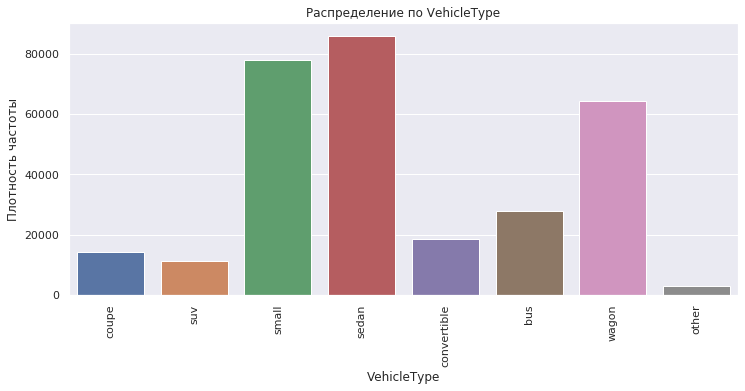



NotRepaired 
count     264707
unique         2
top           no
freq      231487
Name: NotRepaired, dtype: object


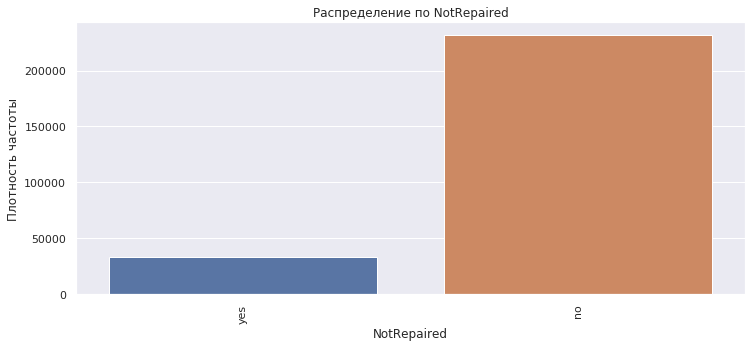



Kilometer 
count    324598.000000
mean     128707.031467
std       37168.979224
min        5000.000000
0%         5000.000000
5%        40000.000000
10%       70000.000000
15%       90000.000000
20%      100000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
80%      150000.000000
85%      150000.000000
90%      150000.000000
95%      150000.000000
max      150000.000000
Name: Kilometer, dtype: float64


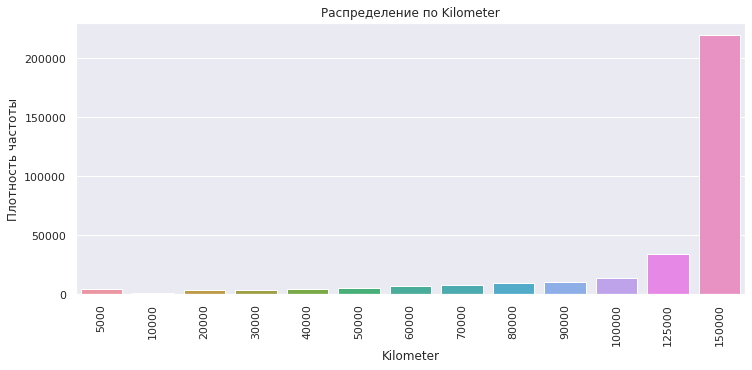



FuelType 
count     299972
unique         7
top       petrol
freq      198976
Name: FuelType, dtype: object


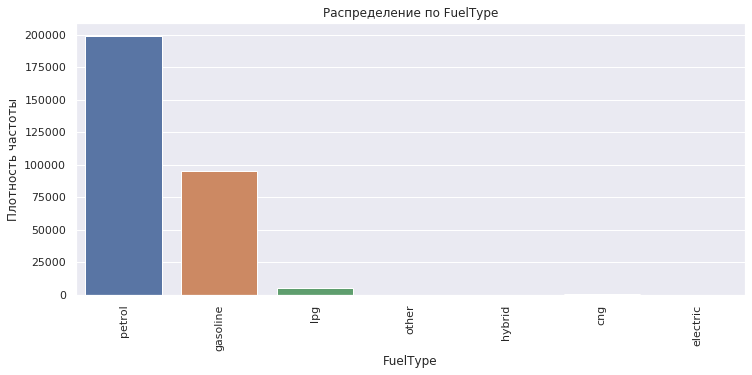



RegistrationMonth 
count    324598.000000
mean          5.902633
std           3.559990
min           1.000000
0%            1.000000
5%            1.000000
10%           1.000000
15%           1.000000
20%           2.000000
25%           3.000000
50%           6.000000
75%           9.000000
80%          10.000000
85%          10.000000
90%          11.000000
95%          12.000000
max          12.000000
Name: RegistrationMonth, dtype: float64


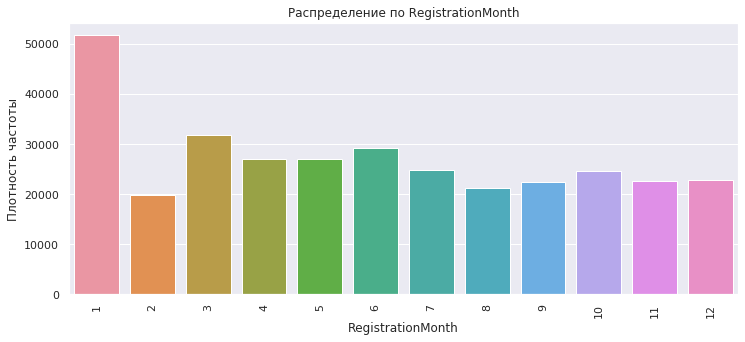



RegistrationYear 
count    324598.000000
mean       2003.370323
std           5.438663
min        1992.000000
0%         1992.000000
5%         1995.000000
10%        1997.000000
15%        1998.000000
20%        1999.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
80%        2008.000000
85%        2009.000000
90%        2011.000000
95%        2013.000000
max        2016.000000
Name: RegistrationYear, dtype: float64


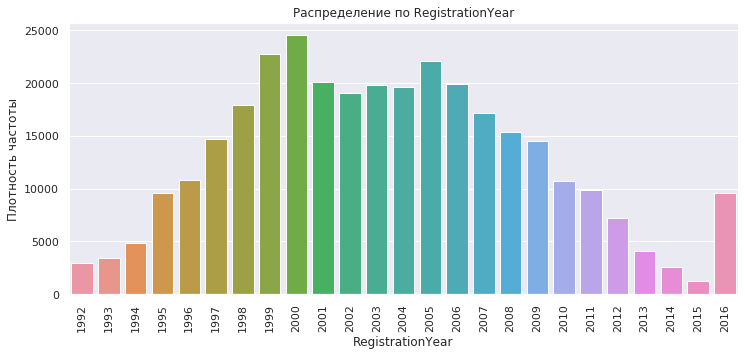



Brand 
count         324598
unique            40
top       volkswagen
freq           68898
Name: Brand, dtype: object


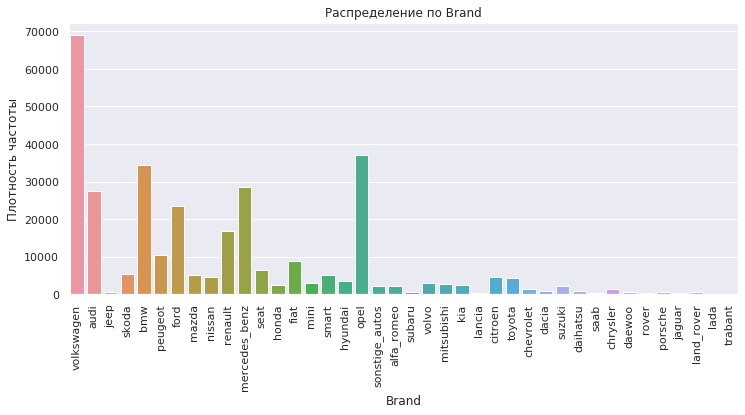



Gearbox 
count     308830
unique         2
top       manual
freq      247165
Name: Gearbox, dtype: object


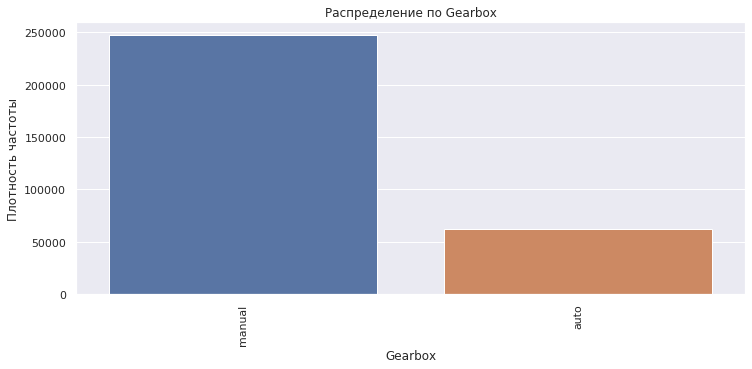

[None, None, None, None, None, None, None, None]

In [22]:
[distribution(feature) for feature in categorial_features_list]

Теперь наблюдаемое больше похоже на правду. Кроме категориальных признаков, у нас есть и численные, посмотрим теперь на них.

In [23]:
def distribution_num(feature):
    print('\033[1m' + feature, '\033[0m')
    print(df[feature].describe(percentiles = [0, .05, .10, .15, .20, .25, .50, .75, .80, .85, .90, .95]))
    fig, ax = plt.subplots(figsize=(12, 5))
    sns.distplot(df[feature])
    ax.set_title('Распределение по '+ feature)
    plt.ylabel('Плотность частоты')
    plt.show()
    print('\n')

In [24]:
numeric_features = df[['Price', 'Power']].copy()
numeric_features

,Price,Power
0,480,0
1,18300,190
2,9800,163
3,1500,75
4,3600,69
...,...,...
354360,0,0
354361,2200,0
354362,1199,101
354363,9200,102


Power 
count    324598.000000
mean        112.156754
std         183.674678
min           0.000000
0%            0.000000
5%            0.000000
10%           0.000000
15%          55.000000
20%          60.000000
25%          71.000000
50%         105.000000
75%         143.000000
80%         150.000000
85%         170.000000
90%         184.000000
95%         218.000000
max       20000.000000
Name: Power, dtype: float64


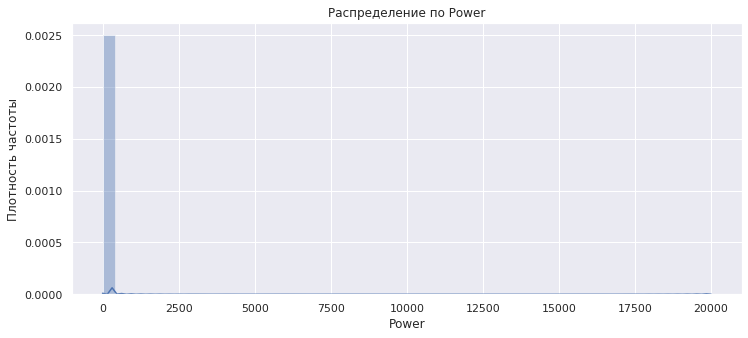



Price 
count    324598.000000
mean       4502.046522
std        4548.886241
min           0.000000
0%            0.000000
5%          200.000000
10%         500.000000
15%         699.000000
20%         900.000000
25%        1100.000000
50%        2800.000000
75%        6500.000000
80%        7800.000000
85%        9300.000000
90%       11500.000000
95%       14800.000000
max       20000.000000
Name: Price, dtype: float64


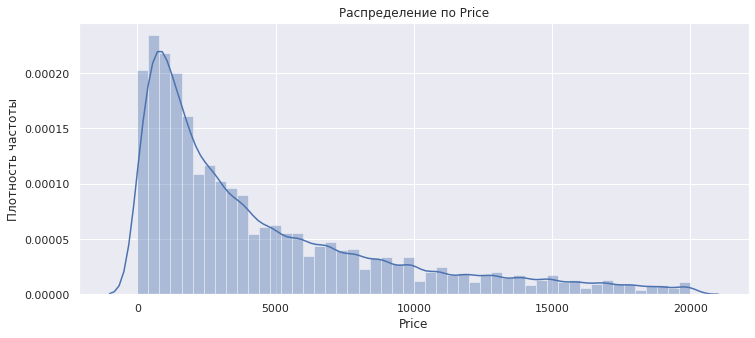

[None, None]

In [25]:
[distribution_num(feature) for feature in set(numeric_features.columns)]

И тут не обошлось без аномалий, выбросы есть как в цене, так и в мощности. Их придется отбросить.

In [26]:
df = df.drop(df[(df.Price < df.Price.quantile(.05))].index)
df = df.drop(df[(df.Power < df.Power.quantile(.15)) | (df.Power > df.Power.quantile(.95))].index)
numeric_features = df[['Price', 'Power']].copy()
numeric_features

,Price,Power
1,18300,190
2,9800,163
3,1500,75
4,3600,69
5,650,102
...,...,...
354355,7900,140
354357,5250,150
354362,1199,101
354363,9200,102


Взглянем на очищенные данные.

Power 
count    248623.000000
mean        118.490075
std          38.983691
min          60.000000
0%           60.000000
5%           60.000000
10%          69.000000
15%          75.000000
20%          77.000000
25%          88.000000
50%         115.000000
75%         144.000000
80%         150.000000
85%         163.000000
90%         170.000000
95%         192.000000
max         220.000000
Name: Power, dtype: float64


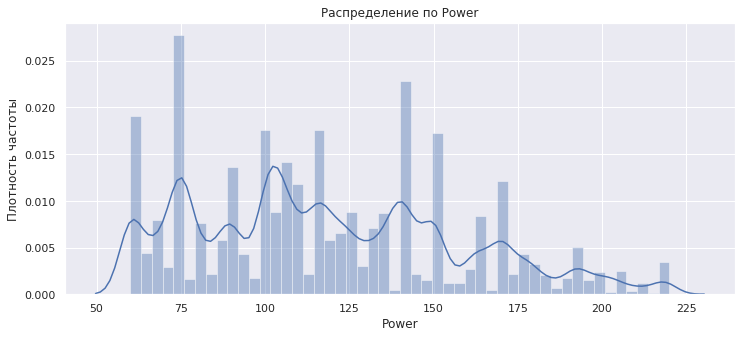



Price 
count    248623.000000
mean       4850.691119
std        4408.215215
min         200.000000
0%          200.000000
5%          500.000000
10%         750.000000
15%         999.000000
20%        1200.000000
25%        1500.000000
50%        3350.000000
75%        6900.000000
80%        7999.000000
85%        9500.000000
90%       11500.000000
95%       14599.000000
max       20000.000000
Name: Price, dtype: float64


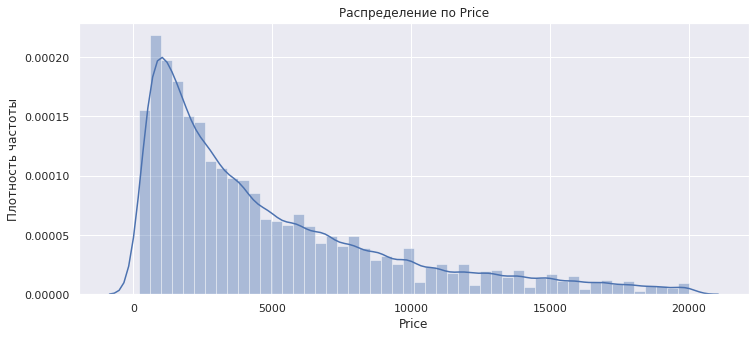

[None, None]

In [27]:
[distribution_num(feature) for feature in set(numeric_features.columns)]

Аномалии обработаны. С пропусками ситуация несколько сложнее, так как правильно заменить их нам попросту не удастся, любое замещение молжет привести к серьезным ошибкам. Поэтому оставим пропуски не тронутыми. Отбрасывать такой огромный пласт данных значит потерять большое количество важной информации, а модели сами учтут их в процессе работы.

В датасете большое количество категориальных признаков, имеющих строковый тип данных, с которым модели не смогут работать. Используем метод прямого кодирования для их преобразования.

In [28]:
df_ohe = pd.get_dummies(df, drop_first=True)
df_ohe

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,...,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo,NotRepaired_yes
1,18300,2011,190,125000,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,9800,2004,163,125000,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1500,2001,75,150000,6,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,3600,2008,69,90000,7,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5,650,1995,102,150000,10,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354355,7900,2010,140,150000,7,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
354357,5250,2016,150,150000,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354362,1199,2000,101,125000,3,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
354363,9200,1996,102,150000,3,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Разделим данные на датасет с признаками и целевой датасет, а затем вновь полученные датасеты разделим на обучающий и тестовый

In [29]:
features = df_ohe.drop('Price', axis = 1)
target = df_ohe['Price']
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

Проверим правильность разбиения

In [30]:
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(186467, 298) (62156, 298) (186467,) (62156,)


In [31]:
features.columns

Index(['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',
       'VehicleType_convertible', 'VehicleType_coupe', 'VehicleType_other',
       'VehicleType_sedan', 'VehicleType_small', 'VehicleType_suv',
       ...
       'Brand_skoda', 'Brand_smart', 'Brand_sonstige_autos', 'Brand_subaru',
       'Brand_suzuki', 'Brand_toyota', 'Brand_trabant', 'Brand_volkswagen',
       'Brand_volvo', 'NotRepaired_yes'],
      dtype='object', length=298)

Во избежание влияния дисбаланса классов уравновесим их с помощью метода StandardScaler

In [32]:
scaler = StandardScaler()
scaler.fit(features_train[['Power', 'Kilometer']])
features_train[['Power', 'Kilometer']] = scaler.transform(features_train[['Power', 'Kilometer']])
features_test[['Power', 'Kilometer']] = scaler.transform(features_test[['Power', 'Kilometer']])

На этом предобработка данных завершена и мы можем приступать к работе с моделями.

## Обучение моделей

Для начала определим метрику, по которой будем оценивать качество наших моделей. Для задач регрессии подойдет среднеквадратичное отклонение.

In [33]:
def RMSE(target, predict):
    return mean_squared_error(target,predict)**0.5

In [34]:
score = make_scorer(RMSE, greater_is_better=False)

Для наиболее эффективной работы модели прибегнем к кросс-валидации данных. ВАоспользуемся методом ShuffleSplit, будем делить данные на 10 подвыборок.

In [35]:
cross_val = ShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

### Модель линейной регрессии 

Первым делом проверим простейшую предсказательную модель - линейную регрессию. Она практически не настраивается, имеет не самое высокое качество предсказаний, однако работает крайне быстро и поможет нам провести сравнительный анализ моделей в дальнейшем.

In [36]:
LinearReg_model = LinearRegression()

In [37]:
%%time
LinearReg_model.fit(features_train, target_train)

CPU times: user 12.5 s, sys: 6.99 s, total: 19.4 s
Wall time: 19.4 s


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
%%time
LinReg_predictions = LinearReg_model.predict(features_test)

CPU times: user 79.9 ms, sys: 105 ms, total: 185 ms
Wall time: 180 ms


In [39]:
print('RMSE: ', RMSE(target_test, LinReg_predictions).round(2))

RMSE:  234257255737.21


Высокая скорость работы компенсируется огромной ошибкой в предсказаниях, что делает невозможным применение этой модели на практике.

### Стохастический градиентный бустинг

Следующий на очереди стохастический градиентный бустинг

In [40]:
SGD_model = SGDRegressor(random_state=42)

In [41]:
SGD_model

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

Эта модель уже имеет достаточное колчество настраиваемых параметров, однако чтобы избежать длительного подрбора гиперпараметров и обучения модели, с помощью метода GridSearchCV попробуем найти оптимальные значения лишь у двух гиперпараметров модели. Оценивать качество подобранных параметров будем как раз по метрике RMSE с помощью метода make_scorer, который мы задали выше

In [42]:
param_grid = {'alpha' : [0.0001, 0.001], 'max_iter' : [1000, 10_000]}

In [43]:
grid_cv = GridSearchCV(SGD_model, param_grid, scoring=score, cv=cross_val)

In [44]:
%%time
grid_cv.fit(features_train, target_train)

CPU times: user 7min 10s, sys: 13.1 s, total: 7min 23s
Wall time: 7min 24s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.25, train_size=None),
             error_score='raise-deprecating',
             estimator=SGDRegressor(alpha=0.0001, average=False,
                                    early_stopping=False, epsilon=0.1,
                                    eta0=0.01, fit_intercept=True,
                                    l1_ratio=0.15, learning_rate='invscaling',
                                    loss='squared_loss', max_iter=1000,
                                    n_iter_no_change=5, penalty='l2',
                                    power_t=0.25, random_state=42, shuffle=True,
                                    tol=0.001, validation_fraction=0.1,
                                    verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001], 'max_iter': [1000, 10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=make

In [45]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-309819008224415.56
{'alpha': 0.0001, 'max_iter': 1000}


За почти 7 минут мы получили лучшие значения гиперпараметров модели, используем их для дальнейшеей работы.

In [46]:
SGD_model = SGDRegressor(alpha=0.0001, max_iter=1000, random_state=42)

In [47]:
%%time
SGD_model.fit(features_train, target_train)

CPU times: user 21.3 s, sys: 246 ms, total: 21.5 s
Wall time: 21.5 s


SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=42,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [48]:
%%time
SGD_predictions = SGD_model.predict(features_test)

CPU times: user 53.3 ms, sys: 51.9 ms, total: 105 ms
Wall time: 89.8 ms


In [49]:
print('RMSE: ', RMSE(target_test, SGD_predictions).round(2))

RMSE:  379317410593825.25


Высокая скорость обучения и предсказания, тем не менее, вновь невелируется крайне плохим результатом - значение ошибки непозволительно велико, что говорит нам о непригодности работы такой модели для решения поставленной задачи.

### Модель XGBoost

Повторим аналогичные операции для модели XGBoost.

In [50]:
XGBRegressor_model = XGBRegressor(verbosity=0, random_state=42, n_job=-1)

In [51]:
XGBRegressor_model

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_job=-1, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=0)

In [52]:
param_grid = {'max_depth': [2, 4, 6], 'n_estimators': [50, 100, 200]}

In [53]:
grid_cv = GridSearchCV(XGBRegressor_model, param_grid, scoring=score, cv=cross_val)

In [54]:
#%%time
#grid_cv.fit(features_train, target_train, verbose=True)

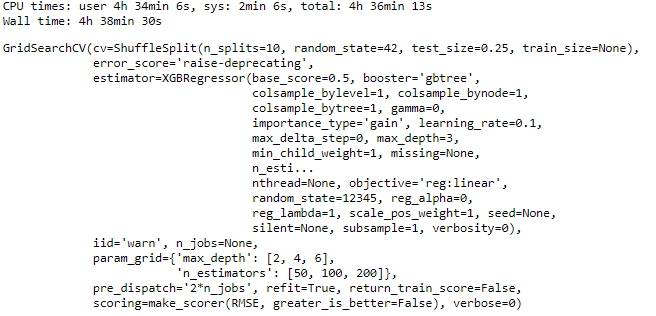

In [55]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

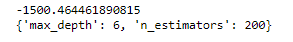

Данная модель подбирает параметры и обучается невероятно долго, поэтому, для облегчения задачи, я приложил скриншоту готовых вычислений подбора параметров. 

In [56]:
XGBRegressor_model = XGBRegressor(verbosity=0, max_depth=6, n_estimators=200, random_state=42, n_job=-1)

In [57]:
%%time
XGBRegressor_model.fit(features_train, target_train)

CPU times: user 5min 55s, sys: 1.49 s, total: 5min 57s
Wall time: 5min 57s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=None, n_estimators=200,
             n_job=-1, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=0)

In [58]:
%%time
XGB_predictions = XGBRegressor_model.predict(features_test)

CPU times: user 724 ms, sys: 188 ms, total: 912 ms
Wall time: 918 ms


In [59]:
print('RMSE: ', RMSE(target_test, XGB_predictions).round(2))

RMSE:  1489.28


Модель работала очень долго, но результат на несколько порядков лучше вышеописанных моделей. Тем не менее, крайне низкая скорость работы - существенный минус, который ставит под сомнение возможность работы такого алгоритма для решения поставленной задачи.

### Модель CatBoost

На очереди CatBoost, проделаем все те же операции, что и ранее

In [60]:
CBRegressor_model = CatBoostRegressor(verbose = 10, random_seed = 42)

In [61]:
param_grid = {'iterations': [10, 50], 'max_depth': [5, 15]}

In [62]:
grid_cv = GridSearchCV(CBRegressor_model, param_grid, scoring=score, cv=cross_val)

In [63]:
#%%time
#grid_cv.fit(features_train, target_train, verbose=False)

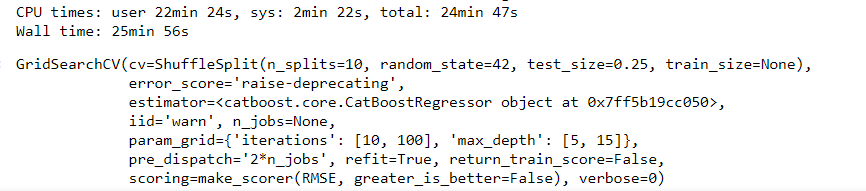

In [64]:
#print(grid_cv.best_score_)
#print(grid_cv.best_params_)

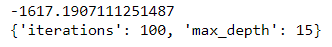

Аналогично XGBoost'у, подбор параметров задаял длительное время, хотя и существенно меньшее, нежели у XGBoost'а, поэтому прилагаю скриншот уже полученных оптимальных параметров модели.

In [65]:
CBRegressor_model = CatBoostRegressor(verbose = 10, iterations = 100, max_depth = 15)

In [66]:
%%time
CBRegressor_model.fit(features_train, target_train)

0:	learn: 4301.5364394	total: 1.36s	remaining: 2m 14s
10:	learn: 3445.1322669	total: 9.65s	remaining: 1m 18s
20:	learn: 2839.3149644	total: 18.4s	remaining: 1m 9s
30:	learn: 2414.9818807	total: 27.2s	remaining: 1m
40:	learn: 2121.9770980	total: 35.7s	remaining: 51.3s
50:	learn: 1927.3591220	total: 44.3s	remaining: 42.6s
60:	learn: 1794.4468515	total: 52.7s	remaining: 33.7s
70:	learn: 1703.0645685	total: 1m 1s	remaining: 25s
80:	learn: 1642.7360960	total: 1m 9s	remaining: 16.4s
90:	learn: 1601.7610944	total: 1m 18s	remaining: 7.72s
99:	learn: 1574.9985274	total: 1m 25s	remaining: 0us
CPU times: user 1min 16s, sys: 12 s, total: 1min 28s
Wall time: 1min 29s


In [67]:
%%time
CB_predictions = CBRegressor_model.predict(features_test)

CPU times: user 106 ms, sys: 10 ms, total: 116 ms
Wall time: 74.7 ms


In [68]:
print('RMSE: ', RMSE(target_test, CB_predictions).round(2))

RMSE:  1612.07


CatBoost ошибся сильнее предыдущей модели, но справился во много раз быстрее, что позволяет нам сделать вывод о его потенциальной пригодности для решения задачи прогнозирования стоимости автомобиля.

### Модель LGBMRegressor

Последняя рассматриваемая нами модель - LGBMRegressor. Повторим операции, аналогичные предыдущим моделям

In [69]:
LGBMRegressor_model = LGBMRegressor(random_state = 42, n_job=-1)

In [70]:
LGBMRegressor_model

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_job=-1, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [71]:
param_grid = {'n_estimators': [100, 1000], 'max_depth': [5, 15]}

In [72]:
grid_cv = GridSearchCV(LGBMRegressor_model, param_grid, scoring=score, cv=cross_val)

In [73]:
%%time
grid_cv.fit(features_train, target_train, verbose=True)

CPU times: user 5min 3s, sys: 13.5 s, total: 5min 17s
Wall time: 5min 17s


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=42, test_size=0.25, train_size=None),
             error_score='raise-deprecating',
             estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                     colsample_bytree=1.0,
                                     importance_type='split', learning_rate=0.1,
                                     max_depth=-1, min_child_samples=20,
                                     min_child_weight=0.001, min_split_gain=0.0,
                                     n_estimators=100, n_job=-1, n_jobs=-1,
                                     num_leaves=31, objective=None,
                                     random_state=42, reg_alpha=0.0,
                                     reg_lambda=0.0, silent=True, subsample=1.0,
                                     subsample_for_bin=200000,
                                     subsample_freq=0),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': 

In [74]:
print(grid_cv.best_score_)
print(grid_cv.best_params_)

-1405.522834440478
{'max_depth': 15, 'n_estimators': 1000}


In [75]:
LGBMRegressor_model = LGBMRegressor(random_state = 42,max_depth= 15, n_estimators= 1000, n_job=-1)

In [76]:
%%time
LGBMRegressor_model.fit(features_train, target_train)

CPU times: user 11.7 s, sys: 391 ms, total: 12.1 s
Wall time: 12.1 s


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=15,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=1000, n_job=-1, n_jobs=-1, num_leaves=31,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=1.0, subsample_for_bin=200000,
              subsample_freq=0)

In [77]:
%%time
LGBM_predictions = LGBMRegressor_model.predict(features_test)

CPU times: user 5.14 s, sys: 99 ms, total: 5.24 s
Wall time: 5.43 s


In [78]:
print('RMSE: ', RMSE(target_test, LGBM_predictions).round(2))

RMSE:  1385.94


Данная модель является безусловным лидером среди всех рассмотренных. Самая маленькая ошибка и самая большая скорость как подбора параметров, так и обучения и предсказания.

## Анализ моделей

Проанализируем, что же мы получили в процессе исследования. Для наглядности, все ключевые данные по моделям сведены в таблицу.

In [79]:
pivot_result=pd.DataFrame({'Модель':['LinearRegression', 'SGDRegressor', 'XGBRegressor', 'CatBoostRegressor', 'LGBMRegressor'],
 'Скорость подбора гиперпараметров':['Гиперпараметры для подбора отсутствуют', '6мин 53сек', '4ч 38мин 30сек', '25мин 56сек', '4мин 59сек'],
 'Скорость обучения':['18сек', '19,4сек', '5мин 25сек', '1мин 56сек', '11.1сек'],
 'Скорость предсказания': ['190мсек', '111мсек', '854мсек', '44.6мсек', '4,65сек'],
 'Качество предсказания(RMSE)': ['234257255737.21', '379317410593825.25', '1489.28', '1612.07', '1385.94']})
pivot_result

,Модель,Скорость подбора гиперпараметров,Скорость обучения,Скорость предсказания,Качество предсказания(RMSE)
0,LinearRegression,Гиперпараметры для подбора отсутствуют,18сек,190мсек,234257255737.21
1,SGDRegressor,6мин 53сек,"19,4сек",111мсек,379317410593825.25
2,XGBRegressor,4ч 38мин 30сек,5мин 25сек,854мсек,1489.28
3,CatBoostRegressor,25мин 56сек,1мин 56сек,44.6мсек,1612.07
4,LGBMRegressor,4мин 59сек,11.1сек,"4,65сек",1385.94


Как видно из полученной таблицы, наиболее удачным вариантом для решения представленной задачи является алгоритм LGBMRegressor. Используя наименьшее время на подбор параметров, достаточно быстро обучаясь и предсказывая значения, он имеет наименьшую ошибку. В качестве альтернативы рекоментуется алгоритм CatBoost, который хуже справляется с задачей, однако всё еще имеет приемлимую скорость работы и достаточно небольшую ошибку. Остальные алгоритмы либо имеют неудовлетворительно высокую скорость работы, либо крайне низкое качество.

## Вывод

По результатам проделанной работы можно сделать слудующие выводы:
- данные поступили сырыми и требовали предобработки
- аномалии и дубликаты удалены, заполнение пропусков не представляется возможным, модели сами их обработают в процессе обучения
- исследовано 5 моделей
- линейная регрессия и стохастический бустинг очень быстрые методы, однако ошибаются настолько сильно, что их использование становится невозможным
- XGBRegressor имеет высокую точность предсказаний, но крайне низкую скорость работы, что также не позволяет использовать этот алгоритм для решения поставленной задачи
- CatBoostRegressor имеет не плохую скорость работы и достаточно высокую точность, что делает его потенциальным кандидатом на использование в дальнейшем
- LGBMRegressor имеет крайне высокую скорость обучения и предсказания, и кроме того дает наименьшую ошибку предсказания, что позволяет рекомендовать именно этот алгоритм для решения задачи предсказания стоимости автомобилей.